In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
pd.read_csv('HEA.csv')

,Unnamed: 0,Initial Comp.,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,MC/MD comp.,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,MC/MD adsorption,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Disorder
0,#,Co,Ni,Cr,Fe,Mn,Temp,Co,Ni,Cr,Fe,Mn,Co,Ni,Cr,Fe,Mn,NaN
1,1,0.2,0.2,0.2,0.2,0.2,1000,0.2247044,0.2085728,0.154564,0.2297946,0.1823642,-0.09912302,-0.03545,0.186016,-0.1213136,0.0698699,0.431388
2,NaN,NaN,NaN,NaN,NaN,NaN,1100,0.217591,0.2077098,0.1684746,0.2217738,0.184451,-0.06130286,-0.02599,0.118474,-0.08839772,0.05721482,0.401656
3,NaN,NaN,NaN,NaN,NaN,NaN,1200,0.2082402,0.2086334,0.1814516,0.2141788,0.1874958,-0.03034456,-0.03521,0.07350504,-0.0554934,0.04754542,0.452747
4,NaN,NaN,NaN,NaN,NaN,NaN,1300,0.2068824,0.2104858,0.1822802,0.2127374,0.187614,-0.0275058,-0.04146,0.07652364,-0.05511442,0.04755238,0.486990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,NaN,NaN,NaN,NaN,NaN,NaN,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043533848,0.00238,0.882206,0.04182214,0.151242,0.560676
1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4518506,-0.06853,-0.04796636,-0.599131,0.006542308,0.358899


In [3]:
df=pd.read_csv('HEA.csv',header=1).iloc[:-8,[6,7,8,9,10,11,-4]]
print(df)

        Temp      Co.1      Ni.1      Cr.1      Fe.1      Mn.1          Cr.2
0     1000.0  0.224704  0.208573  0.154564  0.229795  0.182364      0.186016
1     1100.0  0.217591  0.207710  0.168475  0.221774  0.184451      0.118474
2     1200.0  0.208240  0.208633  0.181452  0.214179  0.187496    0.07350504
3     1300.0  0.206882  0.210486  0.182280  0.212737  0.187614    0.07652364
4     1000.0  0.168400  0.258627  0.160792  0.229293  0.182889     0.1428156
...      ...       ...       ...       ...       ...       ...           ...
1027  1300.0  0.401236  0.106143  0.289865  0.117997  0.084759     0.3029834
1028  1000.0  0.347406  0.363450  0.100015  0.095601  0.093529  -0.002518298
1029  1100.0  0.344201  0.363438  0.102431  0.096211  0.093719  -0.009082314
1030  1200.0  0.349387  0.361459  0.099244  0.096223  0.093687   0.005851341
1031  1300.0  0.345725  0.364544  0.100106  0.095935  0.093691  -0.005243208

[1032 rows x 7 columns]


In [4]:
df.columns=('Temp','Co','Ni','Cr','Fe','Mn','Cr_ad')

In [5]:
print(df)

        Temp        Co        Ni        Cr        Fe        Mn         Cr_ad
0     1000.0  0.224704  0.208573  0.154564  0.229795  0.182364      0.186016
1     1100.0  0.217591  0.207710  0.168475  0.221774  0.184451      0.118474
2     1200.0  0.208240  0.208633  0.181452  0.214179  0.187496    0.07350504
3     1300.0  0.206882  0.210486  0.182280  0.212737  0.187614    0.07652364
4     1000.0  0.168400  0.258627  0.160792  0.229293  0.182889     0.1428156
...      ...       ...       ...       ...       ...       ...           ...
1027  1300.0  0.401236  0.106143  0.289865  0.117997  0.084759     0.3029834
1028  1000.0  0.347406  0.363450  0.100015  0.095601  0.093529  -0.002518298
1029  1100.0  0.344201  0.363438  0.102431  0.096211  0.093719  -0.009082314
1030  1200.0  0.349387  0.361459  0.099244  0.096223  0.093687   0.005851341
1031  1300.0  0.345725  0.364544  0.100106  0.095935  0.093691  -0.005243208

[1032 rows x 7 columns]


In [6]:
x=df.iloc[:,:-1].values
y=df['Cr_ad'].values

In [7]:
x,y

(array([[1.0000000e+03, 2.2470440e-01, 2.0857280e-01, 1.5456400e-01,
         2.2979460e-01, 1.8236420e-01],
        [1.1000000e+03, 2.1759100e-01, 2.0770980e-01, 1.6847460e-01,
         2.2177380e-01, 1.8445100e-01],
        [1.2000000e+03, 2.0824020e-01, 2.0863340e-01, 1.8145160e-01,
         2.1417880e-01, 1.8749580e-01],
        ...,
        [1.1000000e+03, 3.4420080e-01, 3.6343760e-01, 1.0243148e-01,
         9.6211060e-02, 9.3718960e-02],
        [1.2000000e+03, 3.4938700e-01, 3.6145860e-01, 9.9244320e-02,
         9.6222900e-02, 9.3687260e-02],
        [1.3000000e+03, 3.4572500e-01, 3.6454360e-01, 1.0010554e-01,
         9.5935200e-02, 9.3690940e-02]]),
 array(['0.186016', '0.118474', '0.07350504', ..., '-0.009082314',
        '0.005851341', '-0.005243208'], dtype=object))

In [8]:
y=y.astype('float')

In [9]:
y

array([ 0.186016  ,  0.118474  ,  0.07350504, ..., -0.00908231,
        0.00585134, -0.00524321])

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss_x=StandardScaler()

In [12]:
x=ss_x.fit_transform(x)

In [13]:
ss_y=StandardScaler()

In [14]:
y=ss_y.fit_transform(y.reshape(-1,1)).reshape(-1)

In [15]:
y

array([ 0.54995222, -0.00713829, -0.37804499, ..., -1.05923049,
       -0.9360568 , -1.02756531])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [18]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1765)

In [19]:
from tensorflow import keras

In [20]:
model_seq=keras.Sequential([
   keras.layers.Input(shape=(6,)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

In [22]:
inputs=Input(shape=(6,))
hidden=Dense(20,activation='relu')(inputs)
outputs=Dense(1)(hidden)

In [23]:
model_fuc=Model(inputs=inputs,outputs=outputs)

In [24]:
model_fuc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_2 (Dense)             (None, 20)                140       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [25]:
adam=keras.optimizers.Adam(learning_rate=0.001)
model_fuc.compile(optimizer=adam,loss='mse',metrics=['mse']) 

In [26]:
history=keras.callbacks.History()

In [27]:
model_fuc.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,
             callbacks=[history])

Epoch 1/50
23/23 [==============================] - 3s 17ms/step - loss: 1.4206 - mse: 1.4206 - val_loss: 1.8301 - val_mse: 1.8301
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 1.1145 - mse: 1.1145 - val_loss: 1.4863 - val_mse: 1.4863
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.8943 - mse: 0.8943 - val_loss: 1.2079 - val_mse: 1.2079
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.7268 - mse: 0.7268 - val_loss: 1.0018 - val_mse: 1.0018
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.6013 - mse: 0.6013 - val_loss: 0.8199 - val_mse: 0.8199
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.4968 - mse: 0.4968 - val_loss: 0.6970 - val_mse: 0.6970
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.4158 - mse: 0.4158 - val_loss: 0.5950 - val_mse: 0.5950
Epoch 8/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3528 - mse: 0.3

In [28]:
def model_predict(model,x,y,ss_y):
    resoults=model.predict(x)
    y_pre=ss_y.inverse_transform(resoults).reshape(-1,)
    y_real=ss_y.inverse_transform(y.reshape(-1,1)).reshape(-1,)

    return y_real,y_pre

In [29]:
y_real_train,y_pre_train=model_predict(model_fuc,x_train,y_train,ss_y)
y_real_val,y_pre_val=model_predict(model_fuc,x_val,y_val,ss_y)
y_real_test,y_pre_test=model_predict(model_fuc,x_test,y_test,ss_y)

5/5 [==============================] - 0s 2ms/step


In [30]:
from sklearn.metrics import mean_squared_error as mse


In [31]:
error_val=np.sqrt(mse(y_real_val*100,y_pre_val*100))
error_test=np.sqrt(mse(y_real_test*100,y_pre_test*100))
error_train=np.sqrt(mse(y_real_train*100,y_pre_train*100))


In [32]:
print('validation rmse: %.3f' % error_val)
print('test rmse: %.3f' % error_test)
print('train rmse: %.3f' % error_train)

validation rmse: 4.403
test rmse: 4.643
train rmse: 3.687


In [33]:
import matplotlib.pyplot as plt

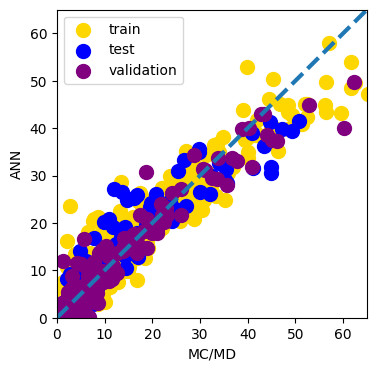

In [36]:
plt.figure(figsize=(4,4))
plt.scatter(y_real_train*100,y_pre_train*100,s=100,c='gold',label='train')
plt.scatter(y_real_test*100,y_pre_test*100,s=100,c='b',label='test')
plt.scatter(y_real_val*100,y_pre_val*100,s=100,c='purple',label='validation')
plt.plot([0,65],[0,65],linestyle='--',linewidth=3)
plt.legend()
plt.xlim(0,65)
plt.ylim(0,65)
plt.xlabel('MC/MD')
plt.ylabel('ANN')
plt.show()

In [39]:
x_pre=[]

for t in np.arange(1000,1310,10):
    for i in np.arange(0.0,0.42,0.02):
        j=0.4-i
        xx=[]
        xx.append(t)
        xx.append(0.2)
        xx.append(0.2)
        xx.append(j)
        xx.append(0.2)
        xx.append(i)
        x_pre.append(xx)
     


x_pre=np.array(x_pre)

In [40]:
x_pre_s=ss_x.transform(x_pre)

In [53]:
y_pre=model_fuc.predict(x_pre_s)

21/21 [==============================] - 0s 2ms/step


In [54]:
y_pre=ss_y.inverse_transform(y_pre)

In [55]:
y_pre=y_pre.reshape(-1)

In [71]:
x0, y0 = np.meshgrid(np.arange(0.00, 0.42, 0.02), np.arange(1000, 1310, 10))


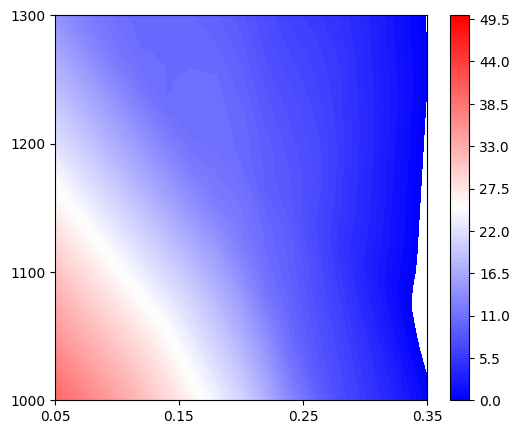

In [85]:
plt.figure(figsize=(6,5))
levels=np.linspace(0,50,101)
plt.contourf(x0, y0, y_pre.reshape(x0.shape)*100, cmap='bwr', levels = levels)
plt.xticks (np.arange(0.05,0.36,0.1))
plt.yticks(np.arange(1000,1301,100))
plt.xlim(0.05,0.35)
plt.ylim(1000,1300)
cb=plt.colorbar()
cb.set_ticks=([0,10,20,3,40,50])
plt.show()

In [89]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

Text(0.5, 0, 'epochs')

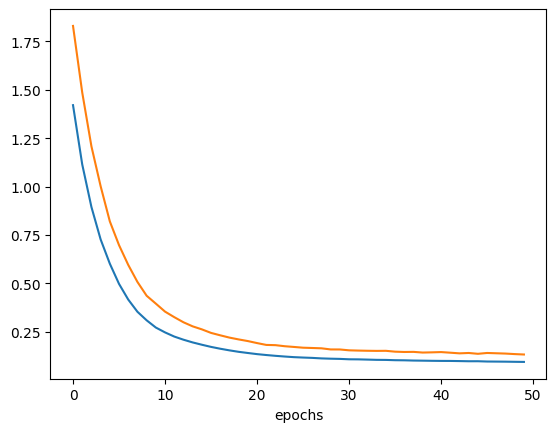

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')